## Customer Segmentation

> Segmentasi pelanggan penting bagi bisnis untuk memahami audiens target mereka. Iklan yang berbeda dapat dikurasi dan dikirim ke segmen audiens yang berbeda berdasarkan profil demografis, minat, dan tingkat kemakmuran mereka.

> Ada banyak algoritma unsupervised machine learning yang dapat membantu perusahaan mengidentifikasi basis pengguna mereka dan menciptakan segmen konsumen.

> Algoritme K-means Clustering dapat mengambil data pelanggan yang tidak berlabel dan menetapkan setiap titik data ke cluster.

> Tujuan dari K-Means adalah untuk mengelompokkan semua data yang tersedia ke dalam sub-kelompok yang tidak tumpang tindih yang berbeda satu sama lain. Artinya setiap subgrup/cluster akan terdiri dari fitur-fitur yang membedakannya dengan cluster lainnya.

> K-Means Clustering adalah teknik yang umum digunakan oleh para Data Scientist untuk membantu perusahaan dengan segmentasi pelanggan. Ini merupakan keterampilan yang penting untuk dimiliki karena dapat diterapkan dalam skenario kehidupan nyata.

## Metodologi

*   Data pre-processing untuk K-Means Clustering
*   Membangun algoritma K-Means Clustering dari awal
*   Metrik yang digunakan untuk mengevaluasi kinerja model clustering
*   Memvisualisasikan cluster yang dibangun
*   Interpretasi dan analisis cluster yang dibangun

## Import Library

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## Reading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kumpulan Dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


> Ada lima variabel dalam dataset. **CustomerID** adalah pengidentifikasi unik dari setiap pelanggan dalam kumpulan data, dan kita dapat menghapus variabel ini. Itu tidak akan memberikan kita informasi cluster yang berguna.

> Karena **gender** adalah variabel categorical, maka perlu dilakukan encode dan diubah menjadi numerik.

> Semua variabel lain akan diskalakan untuk mengikuti distribusi normal sebelum dimasukkan ke dalam model. Kita akan membakukan variabel-variabel ini dengan rata-rata 0 dan standar deviasi 1.

## Standardizing Variables

> Kita lakukan standarisasi pada semua variabel dalam dataset untuk membuatnya berada pada skala yang sama.

In [ ]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [ ]:
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


> Dapat di lihat bahwa semua variabel telah diubah, dan sekarang berpusat di sekitar nol.

## One hot encoding

> Variabel **gender** bersifat categorical, dan ini perlu di ubah menjadi variabel numerik.

> Ini berarti bahwa kita perlu mengganti angka untuk setiap kategori. Kita bisa melakukan ini dengan *Pandas* menggunakan method `pd.get_dummies()`

In [ ]:
gender = df['Gender']

#menggabungkan data dari scaled_features ke dalam newdf
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

In [ ]:
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


> Kita dapat lihat bahwa variabel **gender** telah berubah. Jika kita cermati lagi, variabel **Gender_Male** telah di buang dari bingkai data. Ini karena kita tidak perlu lagi menyimpan variabel tersebut.

> Nilai untuk **Gender_Male** dapat disimpulkan dari **Gender_Female**, (yaitu, jika **Gender_Female** adalah 0, maka **Gender_Male** akan menjadi 1 dan sebaliknya).

## Building the clustering model

> Kita akan membangun model K-means Clustering dan menyesuaikannya pada semua variabel dalam dataset. Kemudian, kita akan memvisualisasikan kinerja model pengelompokan dalam elbow plot. Elbow Plot akan memberi tahu kita jumlah cluster yang ideal untuk digunakan saat membangun model.

### Visualisasi Kinerja Model

Text(0, 0.5, 'Inertia')

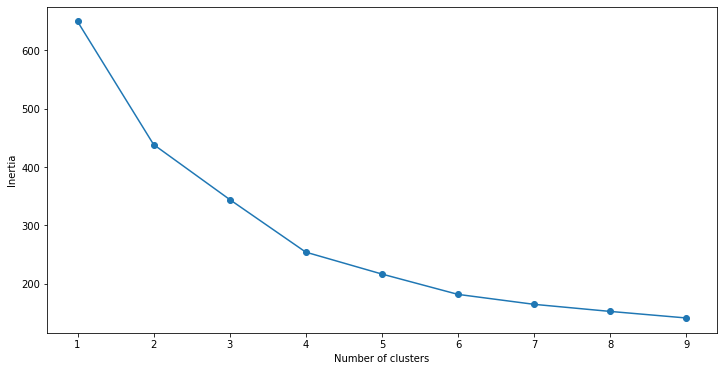

In [ ]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

> Berdasarkan elbow plot di atas, kita dapat melihat bahwa jumlah cluster yang optimal adalah 4.

### Silhouette coefficient

> Silhouette coefficient, atau skor siluet adalah metrik yang digunakan untuk mengevaluasi kualitas cluster yang dibuat oleh algoritme.

> Skor siluet berkisar dari -1 hingga +1. Semakin tinggi skor siluet, semakin baik modelnya.

> Skor siluet mengukur jarak antara semua titik data dalam cluster yang sama. Semakin rendah jarak ini, semakin baik skor siluet. Ini juga mengukur jarak antara objek dan titik data di cluster terdekat. Semakin tinggi jarak ini, semakin baik.

> Skor siluet yang mendekati +1 menunjukkan kinerja pengelompokan yang baik, dan skor siluet yang mendekati -1 menunjukkan model pengelompokan yang buruk.

In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.35027020434653977


> Skor siluet model ini adalah sekitar ___

> Ini bukan model yang buruk, tetapi kita dapat membuat yang lebih baik dan mencoba mendapatkan pemisahan cluster yang lebih tinggi.

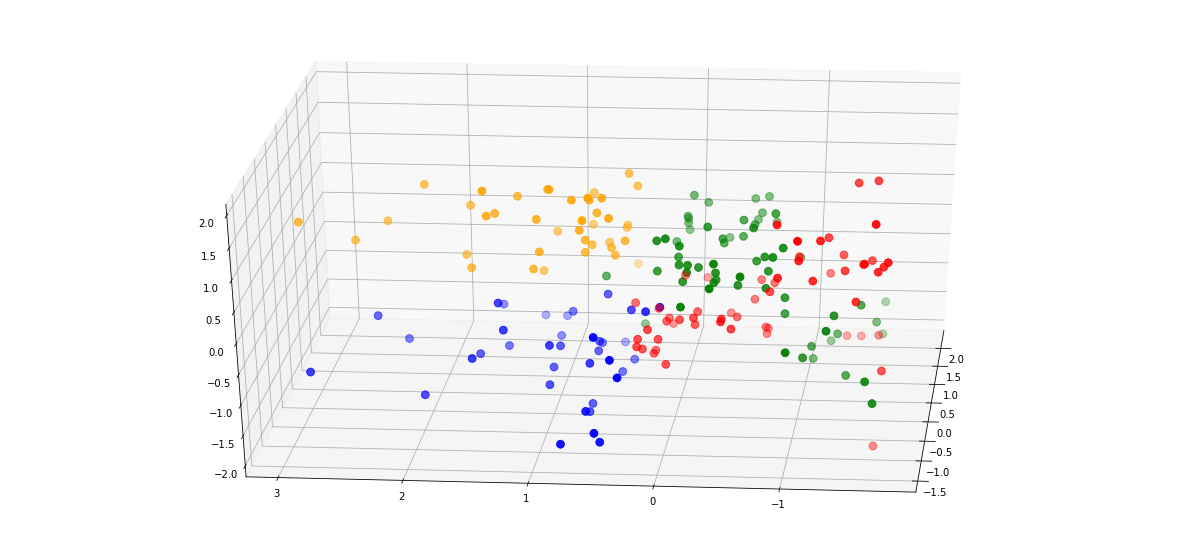

In [ ]:
clusters = kmeans.fit_predict(newdf)
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

> Dari diagram di atas, kita dapat melihat bahwa pemisahan cluster tidak terlalu besar.

> Ini, bersama dengan skor siluet menunjukkan kepada kita bahwa model tidak berkinerja terlalu baik.

> Sekarang, mari kita buat model baru yang memiliki keterpisahan cluster yang lebih baik daripada yang ini.

## Building the clustering model#2

> Untuk model ini, mari kita lakukan beberapa seleksi fitur. Kita dapat menggunakan teknik yang disebut *Principal Component Analysis (PCA)*.

> PCA adalah teknik yang membantu kita mengurangi dimensi dataset. Saat kita menjalankan PCA pada dataset, komponen baru akan dibuat. Komponen-komponen ini menjelaskan varians maksimum dalam model. Kita dapat memilih subset dari variabel-variabel ini dan memasukkannya ke dalam model K-means.

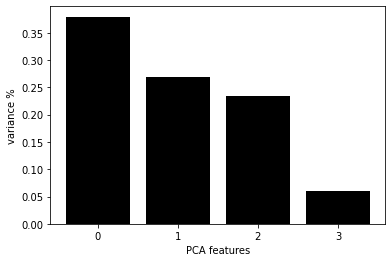

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

> Pada bagan di atas menunjukkan kepada kita setiap komponen PCA, beserta variansnya. Berdasarkan visualisasi, kita dapat melihat bahwa dua komponen PCA pertama menjelaskan sekitar 70% dari varian dataset. Kita dapat memasukkan dua komponen ini ke dalam model.

> Mari kita membangun model lagi dengan dua komponen utama pertama, dan memutuskan jumlah cluster yang akan digunakan:

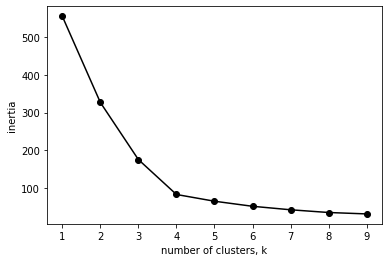

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

> Sekali lagi, sepertinya jumlah cluster yang optimal adalah 4. Kita dapat menghitung skor siluet untuk model ini dengan 4 cluster.

In [ ]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

0.6042918092689442


> Skor siluet model ini adalah ___, pastinya lebih baik dari model yang sebelumnya kita buat.

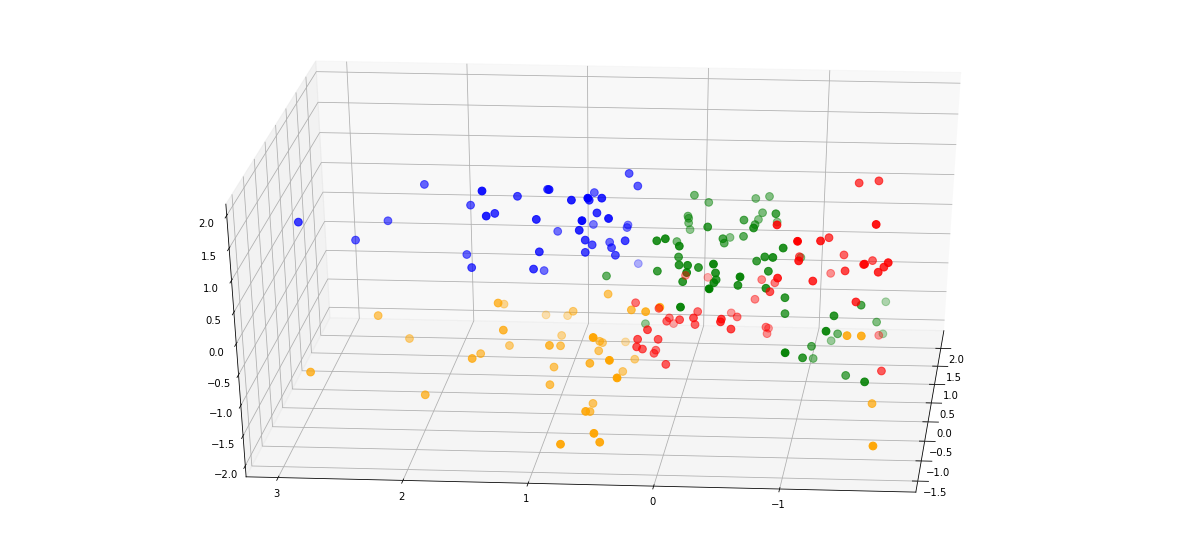

In [ ]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

## Model 1 vs Model 2

> Mari kita perhatikan bahwa cluster dalam model kedua jauh lebih baik pemisahannya daripada di model pertama. Selanjutnya, skor siluet model kedua jauh lebih tinggi. Untuk itu, kita dapat memilih model kedua untuk melanjutkan analisis.

## Cluster Analysis

> Sekarang setelah kita selesai membangun cluster yang berbeda ini, mari kita coba menafsirkannya dan melihat segmen pelanggan yang berbeda.

> Pertama, mari kita petakan cluster kembali ke dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kumpulan Dataset/Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,1


> Perhatikan jika setiap baris dalam data frame sekarang ditetapkan ke sebuah cluster.

> Untuk membandingkan atribut dari cluster yang berbeda, kita coba cari rata-rata semua variabel di setiap cluster:

In [ ]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,32.875000,86.100000,81.525000
1,1,25.185185,41.092593,62.240741
2,2,54.281250,48.171875,40.500000
3,3,38.595238,80.142857,19.666667


> Kita dapat menginterpretasikan cluster ini dengan lebih mudah jika kita memvisualisasikannya.

### Spending Score vs Annual Income vs Age

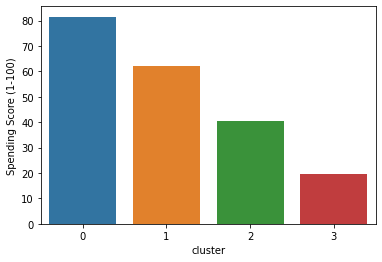

In [ ]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

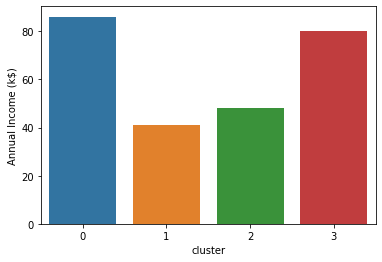

In [ ]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

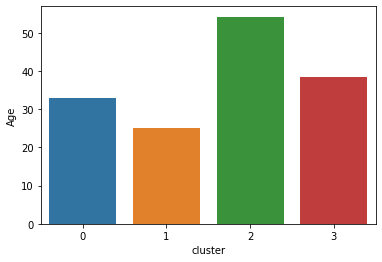

In [ ]:
sns.barplot(x='cluster',y='Age',data=avg_df)

### Gender Breakdown

In [ ]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2

Gender
cluster Gender        
0       Female      22
        Male        18
1       Female      32
        Male        22
2       Female      36
        Male        28
3       Female      22
        Male        20

### Main attributes of each segment

*   Cluster 0:
<br>Pendapatan tahunan rata-rata tinggi, pengeluaran tinggi. 
<br>Usia rata-rata adalah sekitar 33 tahunan.
<br><br>
*   Cluster 1:
<br>Pendapatan rata-rata, kapasitas belanja cukup tinggi.
<br>Usia rata-rata adalah sekitar 25 dan jenis kelamin didominasi perempuan.
<br><br>
*   Cluster 2:
<br>Pendapatan rata-rata menengah ke atas, skor pengeluaran rata-rata.
<br>Usia rata-rata adalah sekitar 55 dan jenis kelamin didominasi perempuan.
<br><br>
*   Cluster 3:
<br>Pendapatan rata-rata tinggi, skor pengeluaran rendah.
<br>Usia rata-rata adalah sekitar 37.

> Penting untuk dicatat bahwa menghitung usia rata-rata akan memberikan wawasan yang lebih baik tentang distribusi usia dalam setiap kelompok.

> Juga, perempuan lebih terwakili di seluruh dataset, itulah sebabnya sebagian besar cluster berisi lebih banyak perempuan daripada laki-laki. Kita dapat menemukan persentase setiap jenis kelamin relatif terhadap angka-angka di seluruh kumpulan data untuk memberi kita gambaran yang lebih baik tentang distribusi jenis kelamin.

## Building personas around each cluster

>  Sekarang setelah kita mengetahui atribut setiap cluster, kita dapat membangun persona di sekitar mereka.

> Mampu menuliskan hasil analisis adalah keterampilan penting yang harus dimiliki sebagai Data Scientist.

> Ini akan membantu klien atau pemangku kepentingan untuk memahami temuan kita dengan lebih mudah.

### Cluster 0: The frugal spende

> Segmen ini terdiri dari individu paruh baya yang sangat berhati-hati dengan uang.

> Meskipun memiliki pendapatan rata-rata tertinggi dibandingkan dengan individu di semua kelompok lain, pengeluaran mereka paling sedikit.

> Ini mungkin karena mereka memiliki tanggung jawab keuangan — seperti menabung untuk pendidikan tinggi anak mereka.

> Rekomendasi: Promo, kupon, dan kode diskon akan menarik individu di segmen ini karena kecenderungan mereka untuk berbelanja lebih sedikit.

### Cluster 1: The careless buyer

> Segmen ini terdiri dari kelompok usia yang lebih muda.

> Individu di segmen ini kemungkinan besar adalah kelompok yang baru pertama bekerja. Mereka menghasilkan uang paling sedikit dibandingkan dengan semua segmen lainnya.

> Namun, mereka adalah pembelanja yang sangat tinggi.

> Ini adalah individu-individu muda yang antusias yang menikmati menjalani gaya hidup yang baik, dan cenderung menghabiskan uang di atas kemampuan mereka.

> Rekomendasi: Karena ini adalah individu muda yang menghabiskan banyak uang, memberi mereka kupon perjalanan atau diskon hotel mungkin merupakan ide yang bagus. Memberi mereka diskon dari merek pakaian dan make-up terkenal juga akan bekerja dengan baik untuk segmen ini.

### Cluster 2: Almost retired

> Segmen ini terdiri dari kelompok orang yang lebih tua.

> Mereka berpenghasilan lebih sedikit dan membelanjakan lebih sedikit, dan mungkin menabung untuk masa pensiun.

> Rekomendasi: Pemasaran kepada individu-individu ini dapat dilakukan melalui Facebook, yang menarik bagi demografis yang lebih tua. Promosikan produk terkait perawatan kesehatan kepada orang-orang di segmen ini.

### Cluster 3: Highly affluent individuals

> Segmen ini terdiri dari individu paruh baya.

> Ini adalah individu yang telah bekerja keras untuk membangun sejumlah besar kekayaan.

> Mereka juga menghabiskan banyak uang untuk menjalani gaya hidup yang baik.

> Orang-orang ini kemungkinan baru saja memulai sebuah keluarga, dan memimpin gaya hidup yang berfokus pada bayi atau keluarga. Merupakan ide bagus untuk mempromosikan produk terkait bayi atau anak kepada orang-orang ini.

> Rekomendasi: Karena kapasitas pembelanjaan dan demografi mereka yang besar, individu-individu ini cenderung mencari properti untuk dibeli atau diinvestasikan. Mereka juga lebih mungkin daripada semua segmen lain untuk mengambil pinjaman perumahan dan membuat komitmen keuangan yang serius.

## Conclusion

> Kita telah berhasil membangun model clustering K-Means untuk segmentasi pelanggan. Kita juga mengeksplorasi interpretasi cluster, dan menganalisis perilaku individu di setiap cluster.

> Kita melihat beberapa rekomendasi bisnis yang dapat diberikan berdasarkan atribut masing-masing individu dalam cluster.